<font color=red><p style="font-size:32px;text-align:center"><b>Amazon Fine Food Reviews</b></p></font>

<h3><font color=green>Context</font></h3>
- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

<h3><font color=green>Contents</font></h3>
- database.sqlite: Contains the table 'Reviews


- **Source:** <a href="https://www.kaggle.com/snap/amazon-fine-food-reviews">Kaggle: Amazon Fine Food Reviews</a>


**The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.**<br>

- Number of reviews: 568,454<br>
- Number of users: 256,059<br>
- Number of products: 74,258<br>
- Timespan: Oct 1999 - Oct 2012<br>
- Number of Attributes/Columns in data: 10 

**Attribute Information:**

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

<h3><font color=green>Objective</font></h3>
- Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

<font color=DodgerBlue><h3>Loading and Reading Data</h3></font>

- In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.
- Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation will be set to "Positive". Otherwise, it will be set to "Negative".

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

db = sqlite3.connect("D:/Case Studies/Amazon Fine Food Reviews/database.sqlite")
#using the SQLite Table to read data

#from 568,454 reviews (data points), we take 60k reviews (data points)
filter_data = pd.read_sql_query("SELECT * FROM Reviews WHERE Score !=3 LIMIT 60000", db)
#filtering only positive and negative reviews i.e. 
#not taking into consideration those reviews with Score=3

In [2]:
print("NUMBER OF DATAPOINTS -", filter_data.shape[0])
print("NUMBER OF FEATURES/COLUMNS -", filter_data.shape[1])
print("FEATURES -", filter_data.columns)

NUMBER OF DATAPOINTS - 60000
NUMBER OF FEATURES/COLUMNS - 10
FEATURES - Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [3]:
filter_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<font color=DodgerBlue><h3>Exploratory Data Analysis</h3></font>

**<font color=DarkCyan>Distribution of Reviews Per Score</font>**

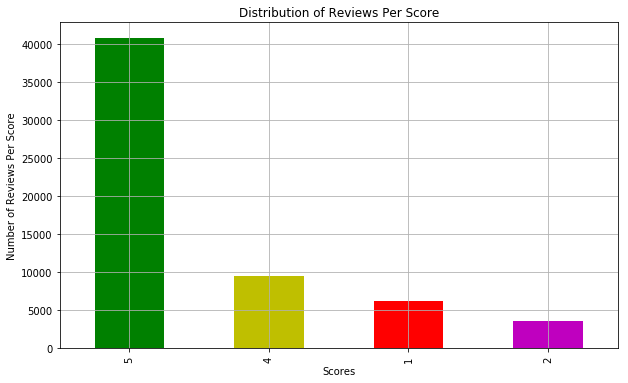

In [4]:
category = filter_data['Score'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'y', 'r', 'm', 'b']

category.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews Per Score")
plt.title("Distribution of Reviews Per Score")
plt.show()

- <p style="font-size:15px">In the next step, If we classify reviews into binary classification, with Score > 3 as a Positive rating and reviews with a score < 3 as a Negative rating, then Positive rating class will become a dominent class with roughly 50k points out of 60k.</p>
- <p style="font-size:15px">This is the Imbalanced Dataset problem. **Imbalanced Data** refers to those types of datasets where the target class has an uneven distribution of observations, i.e **one class label has a very high number of observations** and the **other has a very low number of observations**.</p>


- <p style="font-size:15px">There are lots of techniques to deal with Imbalanced Dataset, but Instead of applying any technique, we will try to apply model on Imbalanced Dataset.</p>

**<font color=DarkCyan>Correlation Between All The Features</font>**

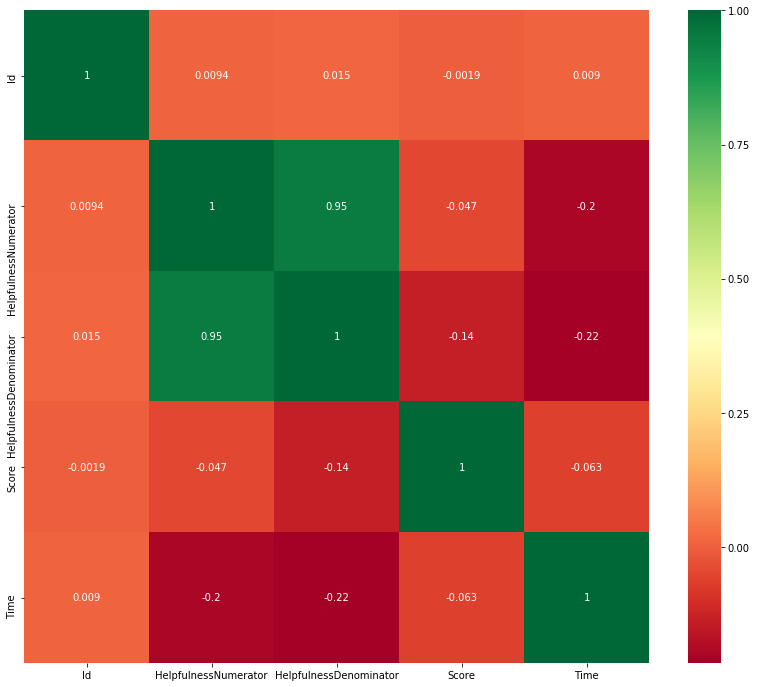

In [5]:
plt.figure(figsize=(14,12))
sns.heatmap(filter_data.corr(),annot=True, cmap ='RdYlGn')

**<font color=DarkCyan>Converting Data into Binary Classification</font>**

In [6]:
#after that, partitioning the reviews
#give reviews with Score > 3 a positive rating and reviews with a score < 3 a negative rating
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

actualScore = filter_data['Score']
pos_neg = actualScore.map(partition)
filter_data['Score'] = pos_neg

filter_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


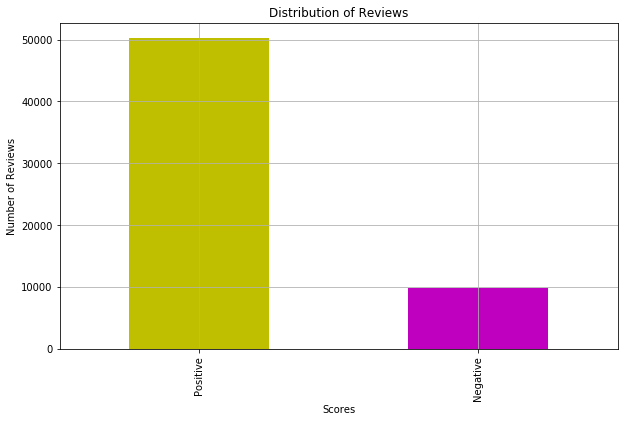

In [7]:
#again plot the data points distribution graph
category = filter_data['Score'].value_counts()
#after partitioning, now Score has only two values i.e., Positive and Negative

plt.figure(figsize=(10,6))
my_colors = ['y', 'm']

category.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()

**<font color=DarkCyan>Data Cleaning: </font>Deduplication**

<p style="font-size:15px">It is observed that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.</p>

In [8]:
#sorting data according to ProductId in ascending order
filter_data = filter_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [9]:
#deduplication of entries
filter_data = filter_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
filter_data.shape

(54458, 10)

<p style="font-size:15px">After removing duplicate entries, we are left with 54458 data points, which means 5542
 entries was removed.</p>

In [10]:
#checking null values
filter_data.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

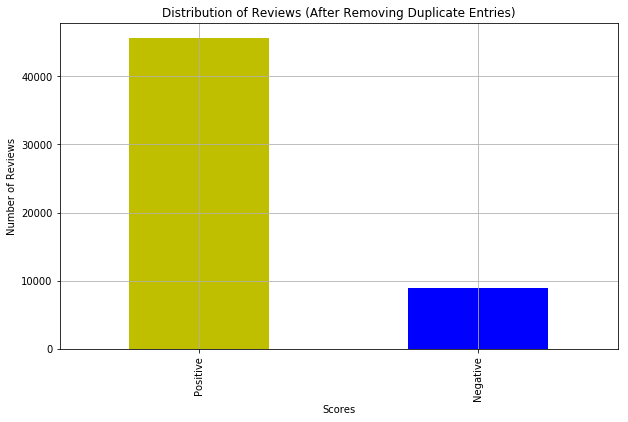

In [11]:
#again plot the data points distribution graph
category = filter_data['Score'].value_counts()
#after partitioning, now Score has only two values i.e., Positive and Negative

plt.figure(figsize=(10,6))
my_colors = ['y', 'b']

category.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews (After Removing Duplicate Entries)")
plt.show()

<font color=DodgerBlue><h3>Data (Text) Preprocessing</h3></font>

In [12]:
import nltk
from nltk.corpus import stopwords
import re

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words("english"))
stop_words.add("br")

def txt_preprocessing(total_txt, idx, column, dataset):
    if type(total_txt) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_txt = re.sub('[^a-zA-Z0-9\n]', ' ', total_txt)
        
        #replace_multiple_spaces_with_single_space
        total_txt = re.sub('\s+',' ', total_txt)
        
        #converting_all_the_chars_into_lower_case
        total_txt = total_txt.lower()
        
        for word in total_txt.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        dataset[column][idx] = string

In [13]:
#text preprocesing on filter_data['Text']
for idx, row in filter_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], idx, 'Text', filter_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :", idx)

filter_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,Positive,1195948800,Dog Lover Delites,dogs love saw pet store tag attached regarding...
22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,Negative,1192060800,made in china,dogs loves chicken product china wont buying a...


**<font color=DarkCyan>Word Clouds</font>**

In [14]:
pos_words = filter_data[filter_data['Score']=='Positive']
neg_words = filter_data[filter_data['Score']=='Negative']

#converting_2d_array_of_Text_and_flatten_the_array
pos = np.dstack([pos_words['Text']]).flatten()
neg = np.dstack([neg_words['Text']]).flatten()

print("NUMBER OF DATA POINTS IN POSITIVE CLASS :",len(pos))
print("NUMBER OF DATA POINTS IN NEGATIVE CLASS :",len(neg))

#saving_the_np_array_into_a_text_file_
file = open("train_p.txt", "w+")
file.write(str(pos))
file.close()

file2 = open("train_n.txt", "w+")
file2.write(str(neg))
file2.close()

NUMBER OF DATA POINTS IN POSITIVE CLASS : 45574
NUMBER OF DATA POINTS IN NEGATIVE CLASS : 8884


In [15]:
#reading_the_text_files_and_removing_the_stop_words:
from os import path
from wordcloud import WordCloud, STOPWORDS

d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()

print("TOTAL NUMBER OF WORDS IN POSITIVE CLASS :",len(textp_w))
print("TOTAL NUMBER OF WORDS IN NEGATIVE CLASS :",len(textn_w))

TOTAL NUMBER OF WORDS IN POSITIVE CLASS : 937
TOTAL NUMBER OF WORDS IN NEGATIVE CLASS : 1612


**<font color=DarkSlateGray>Word Cloud For Positive Class</font>**

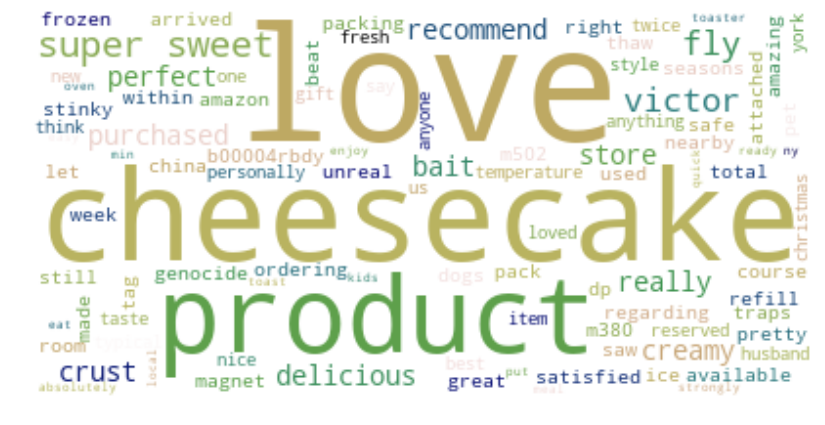

In [16]:
plt.figure(figsize=(14,9))
wc = WordCloud(colormap='gist_earth', background_color="white", max_words=len(textp_w))
wc.generate(textp_w)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**<font color=DarkSlateGray>Word Cloud For Negative Class</font>**

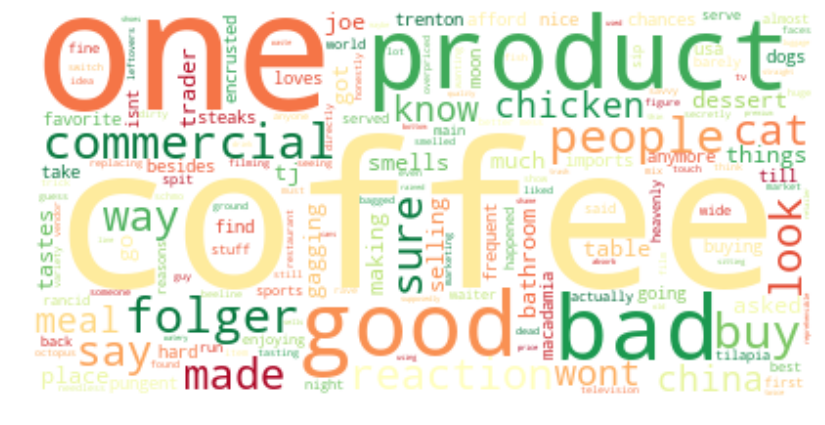

In [17]:
plt.figure(figsize=(14,9))
wc = WordCloud(colormap='RdYlGn', background_color="white", max_words=len(textn_w))
wc.generate(textn_w)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3><font color=DodgerBlue>Train Test Split</font></h3>

In [18]:
from sklearn.model_selection import train_test_split
X = filter_data['Text']
Y = filter_data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [19]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 34852
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 8714
NUMBER OF DATA POINTS IN TEST DATA : 10892


In [20]:
y_train.value_counts()

Positive    29167
Negative     5685
Name: Score, dtype: int64

In [21]:
y_cv.value_counts()

Positive    7292
Negative    1422
Name: Score, dtype: int64

In [22]:
y_test.value_counts()

Positive    9115
Negative    1777
Name: Score, dtype: int64

<h3><font color=DodgerBlue>TF-IDF</font></h3>

In [23]:
#perform_tfidf_vectorization_of_text_data
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=8000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print("Shape of Matrix - TFIDF")
print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

Shape of Matrix - TFIDF
(34852, 7567)
(10892, 7567)
(8714, 7567)


<h3><font color=DodgerBlue>Confusion / Precision / Recall Matrix</font></h3>

In [24]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [0,1]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(8,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(8,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(8,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

<h3><font color=Maroon>Logistic Regression Model</font></h3>

For Values of Alpha = 1e-05 The Log Loss is: 0.19590639144293104
For Values of Alpha = 0.0001 The Log Loss is: 0.2031659406903059
For Values of Alpha = 0.001 The Log Loss is: 0.23120502235832144
For Values of Alpha = 0.01 The Log Loss is: 0.3295618232839956
For Values of Alpha = 0.1 The Log Loss is: 0.41848333484544253
For Values of Alpha = 1 The Log Loss is: 0.42531938368269656


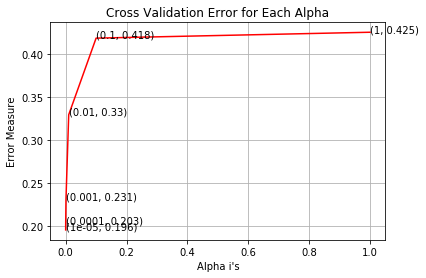

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.14334302199798038
For Values of Best Alpha = 1e-05 The Test Log Loss is: 0.2003013011844608
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.19590639144293104


In [25]:
#train a logistic regression + calibration model using text features which are tfidf encoded
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text, y_train)
    
    predict_y = sig_clf.predict_proba(cv_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text, y_train)

predict_y = lr_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [26]:
lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
lr_test_accuracy = (lr_sig_clf.score(test_text, y_test)*100)
lr_cv_accuracy = (lr_sig_clf.score(cv_text, y_cv)*100)

print("Logistic Regression Train Accuracy -",lr_train_accuracy)
print("Logistic Regression Test Accuracy -",lr_test_accuracy)
print("Logistic Regression CV Accuracy -",lr_cv_accuracy)

Logistic Regression Train Accuracy - 94.81808791461035
Logistic Regression Test Accuracy - 91.81968417186927
Logistic Regression CV Accuracy - 92.035804452605


---------------------------------------- Confusion Matrix ----------------------------------------


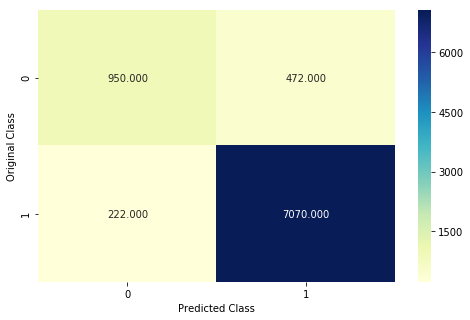

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


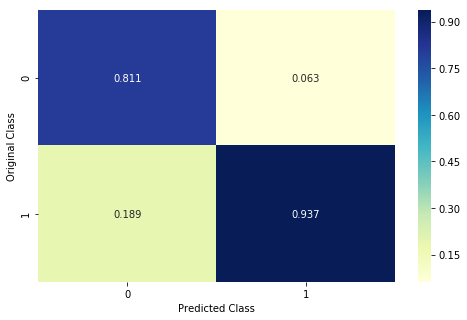

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


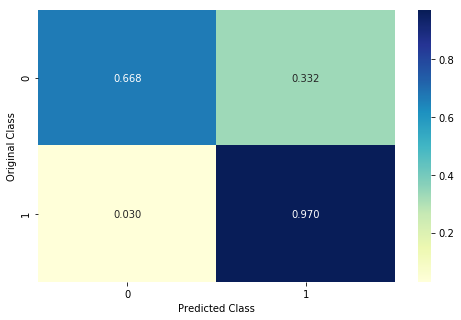

In [27]:
plot_confusion_matrix(y_cv, lr_sig_clf.predict(cv_text.toarray()))

In [28]:
test_pred = lr_sig_clf.predict(test_text)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.66      0.72      1777
    Positive       0.94      0.97      0.95      9115

    accuracy                           0.92     10892
   macro avg       0.87      0.81      0.84     10892
weighted avg       0.91      0.92      0.91     10892

